In [2]:
from orbitflows import HamiltonianMappingModel, generate_sho_orbits
import matplotlib.pyplot as plt
import numpy as np
import torch
from orbitflows import H
from time import time

In [3]:
model = HamiltonianMappingModel(input_dim=2, hidden_dim=128, num_layers=64)
model.flow

TypeError: HamiltonianMappingModel.__init__() missing 1 required positional argument: 'targetPotential'

In [ ]:
n_actions = 10
n_angles = 1000
r_min = 0.5
r_max = 1.5
omega_guess = 1
training_data, aa_guess = generate_sho_orbits(n_actions, omega=omega_guess, t_end=10, n_steps=n_angles, r_bounds=[r_min,r_max]) #

In [ ]:
torch.tensor(aa_guess, requires_grad=True)

/var/folders/s1/bxkg8f1501g2q16qjhch2_qw0000gn/T/ipykernel_13648/447183887.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(aa_guess, requires_grad=True)



tensor([[[1.5708, 0.1250],
         [1.5808, 0.1250],
         [1.5908, 0.1250],
         ...,
         [5.2676, 0.1250],
         [5.2776, 0.1250],
         [5.2876, 0.1250]],

        [[1.5708, 0.1867],
         [1.5808, 0.1867],
         [1.5908, 0.1867],
         ...,
         [5.2676, 0.1867],
         [5.2776, 0.1867],
         [5.2876, 0.1867]],

        [[1.5708, 0.2608],
         [1.5808, 0.2608],
         [1.5908, 0.2608],
         ...,
         [5.2676, 0.2608],
         [5.2776, 0.2608],
         [5.2876, 0.2608]],

        ...,

        [[1.5708, 0.8164],
         [1.5808, 0.8164],
         [1.5908, 0.8164],
         ...,
         [5.2676, 0.8164],
         [5.2776, 0.8164],
         [5.2876, 0.8164]],

        [[1.5708, 0.9645],
         [1.5808, 0.9645],
         [1.5908, 0.9645],
         ...,
         [5.2676, 0.9645],
         [5.2776, 0.9645],
         [5.2876, 0.9645]],

        [[1.5708, 1.1250],
         [1.5808, 1.1250],
         [1.5908, 1.1250],
         ...,
 

/var/folders/s1/bxkg8f1501g2q16qjhch2_qw0000gn/T/ipykernel_41026/901092765.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1729646995093/work/aten/src/ATen/native/TensorShape.cpp:3687.)
  plt.scatter(*training_data.T)



Text(0.5, 1.0, 'Toy Orbits')

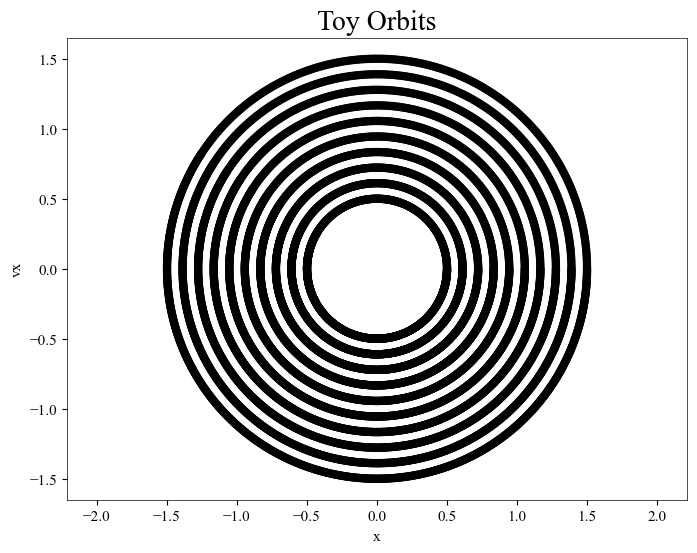

In [ ]:
plt.scatter(*training_data.T)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('vx')
plt.title('Toy Orbits', fontsize=20)

In [ ]:
def isoDiskPotential(x, amp=1, sigma=0.1):
    _H = sigma / torch.sqrt(torch.tensor([8.0 * torch.pi * amp]))[0]
    _sigma2 = sigma**2
    return 2.0 * _sigma2 * torch.log(torch.cosh(0.5 * x / _H))

steps = 400
model.train(isoDiskPotential, training_data, steps, learning_rate=1e-4)

 32%|███▏      | 128/400 [00:43<01:31,  2.97it/s]


KeyboardInterrupt: 

Text(0, 0.5, 'loss')

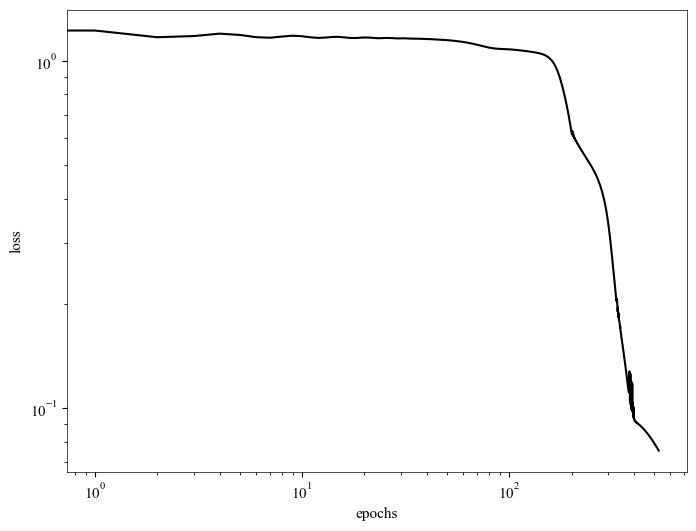

In [ ]:
plt.loglog(model.loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
j0 = aa_guess[...,1].numpy()[0]

In [ ]:
# correct solution
from galpy.actionAngle import actionAngleVerticalInverse
from galpy.potential import IsothermalDiskPotential
aAVI = actionAngleVerticalInverse(pot=IsothermalDiskPotential(), Es=np.linspace(0, 1, 1000), setup_interp=True)
st = time()
q_aAVI, p_aAVI = aAVI(j0, aa_guess[0][..., 0].detach().numpy())
duration_aAVI = time() - st


/opt/anaconda3/envs/MLDyn/lib/python3.12/site-packages/galpy/actionAngle/actionAngleVerticalInverse.py:1257: RuntimeWarning: invalid value encountered in divide
  x = xmax * polynomial.polyval((xa / ptxmax).T, ptcoeffs.T, tensor=False).T

/opt/anaconda3/envs/MLDyn/lib/python3.12/site-packages/galpy/actionAngle/actionAngleVerticalInverse.py:1262: RuntimeWarning: invalid value encountered in divide
  xmax

/opt/anaconda3/envs/MLDyn/lib/python3.12/site-packages/galpy/actionAngle/actionAngleVerticalInverse.py:1264: RuntimeWarning: invalid value encountered in divide
  * polynomial.polyval((xa / ptxmax).T, ptderivcoeffs.T, tensor=False).T

/opt/anaconda3/envs/MLDyn/lib/python3.12/site-packages/galpy/actionAngle/actionAngleVerticalInverse.py:1379: RuntimeWarning: invalid value encountered in divide
  x = xmax * polynomial.polyval((xa / ptxmax).T, ptcoeffs.T, tensor=False).T

/opt/anaconda3/envs/MLDyn/lib/python3.12/site-packages/galpy/actionAngle/actionAngleVerticalInverse.py:1383: RuntimeWa

In [ ]:
torch.stack([torch.tensor(q_aAVI), torch.tensor(p_aAVI)])

tensor([[ 4.4305e-01,  4.4303e-01,  4.4297e-01,  ..., -3.8760e-01,
         -3.8558e-01, -3.8352e-01],
        [ 3.9484e-08, -4.2512e-03, -8.5024e-03,  ...,  2.3579e-01,
          2.4005e-01,  2.4430e-01]], dtype=torch.float64)

In [ ]:
H_correct = H(torch.stack([torch.tensor(q_aAVI), torch.tensor(p_aAVI)]).T, isoDiskPotential)

In [ ]:
H_correct

tensor([0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082, 0.2082,
        0.2082, 0.2082, 0.2082, 0.2083, 

Text(0.5, 1.0, 'model performance')

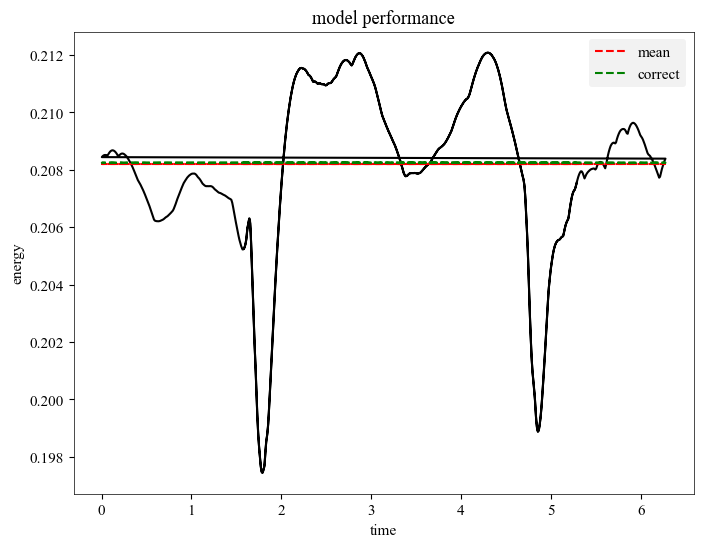

In [ ]:
plt.plot(aa_guess[0][...,0].detach(), model.hamiltonian(aa_guess[0]).detach())
plt.plot(aa_guess[0][...,0].detach(), np.repeat(model.hamiltonian(aa_guess[0]).mean().detach(), len(aa_guess[0][...,0].detach())), 'r--', label='mean')
plt.plot(aa_guess[0][...,0].detach(), H_correct.detach(), 'g--', label='correct')
plt.legend()
plt.xlabel('time')
plt.ylabel('energy')
plt.title('model performance')

In [ ]:
theta_set_arg = np.argmin(np.abs(model.hamiltonian(aa_guess[0]).detach() - H_correct.detach()).numpy())
theta_set = aa_guess[0][theta_set_arg]

/var/folders/s1/bxkg8f1501g2q16qjhch2_qw0000gn/T/ipykernel_41026/3669825041.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  theta_set_arg = np.argmin(np.abs(model.hamiltonian(aa_guess[0]).detach() - H_correct.detach()).numpy())



Text(0.5, 1.0, 'model performance')

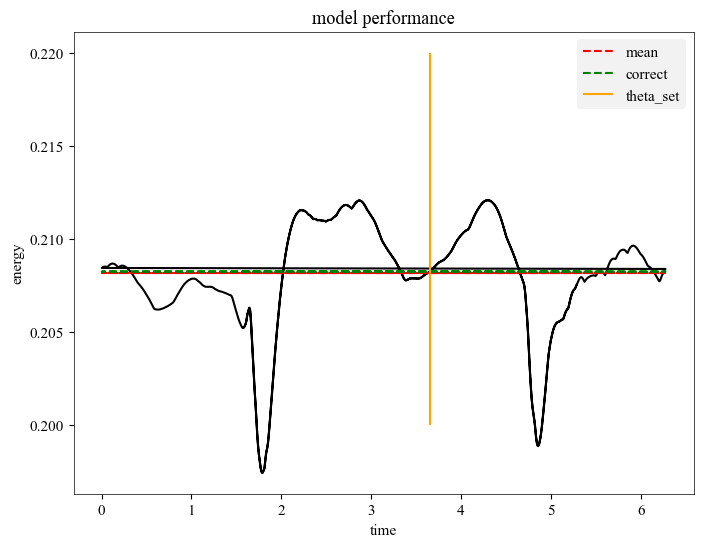

In [ ]:
plt.plot(aa_guess[0][...,0].detach(), model.hamiltonian(aa_guess[0]).detach())
plt.plot(aa_guess[0][...,0].detach(), np.repeat(model.hamiltonian(aa_guess[0]).mean().detach(), len(aa_guess[0][...,0].detach())), 'r--', label='mean')
plt.plot(aa_guess[0][...,0].detach(), H_correct.detach(), 'g--', label='correct')
plt.vlines(theta_set[0], 0.2,0.22, label='theta_set', color='orange')
plt.legend()
plt.xlabel('time')
plt.ylabel('energy')
plt.title('model performance')

In [ ]:
theta_set[0]

tensor(3.6560)

In [ ]:
plt.scatter(aa_guess[...,0], H(training_data, model.targetPotential).detach(), label='pre-training')
plt.scatter(aa_guess[...,0], model.hamiltonian(aa_guess).detach(), label='post-training')
plt.legend()
plt.xlabel('angle', fontsize=20)
plt.ylabel('energy', fontsize=20)

NameError: name 'plt' is not defined

In [ ]:
aa0 = aa_guess[0][0].clone().requires_grad_()

In [ ]:
from orbitflows.integrate import hamiltonian_fixed_angle

In [ ]:
from functools import partial 
h_fixed_angle = partial(hamiltonian_fixed_angle, theta_set=torch.tensor(1.8))

In [ ]:
euler_steps = 100
t_end = 1

st = time()
aa_euler_step = model.integrate(aa0, euler_steps, t_end, hamiltonian_tilde=h_fixed_angle)
euler_duration = time() - st

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:03<00:00, 25.19it/s]


Text(0.5, 1.0, 'euler integration')

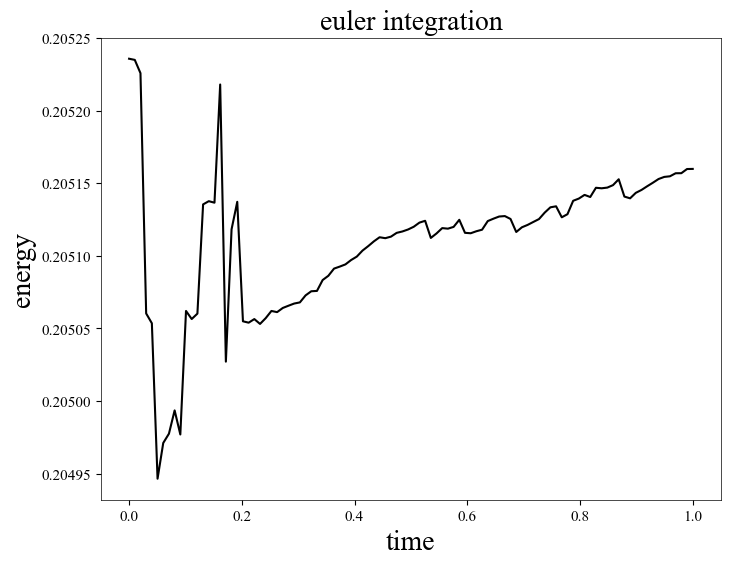

In [ ]:
plt.plot(np.linspace(0, t_end, euler_steps), model.hamiltonian(aa_euler_step).detach(), label='euler')
plt.xlabel('time', fontsize=20)
plt.ylabel('energy', fontsize=20)
plt.title('euler integration', fontsize=20)

In [ ]:
from orbitflows.integrate import rungekutta4 as rk4

In [ ]:
rk4_steps = int(euler_steps)
st = time()
aa_rk4 = model.integrate(aa0, rk4_steps, t_end, correction=rk4)
duration_rk4 = time() - st

100%|██████████| 100/100 [00:12<00:00,  7.87it/s]


Text(0.5, 1.0, 'rk4 integration')

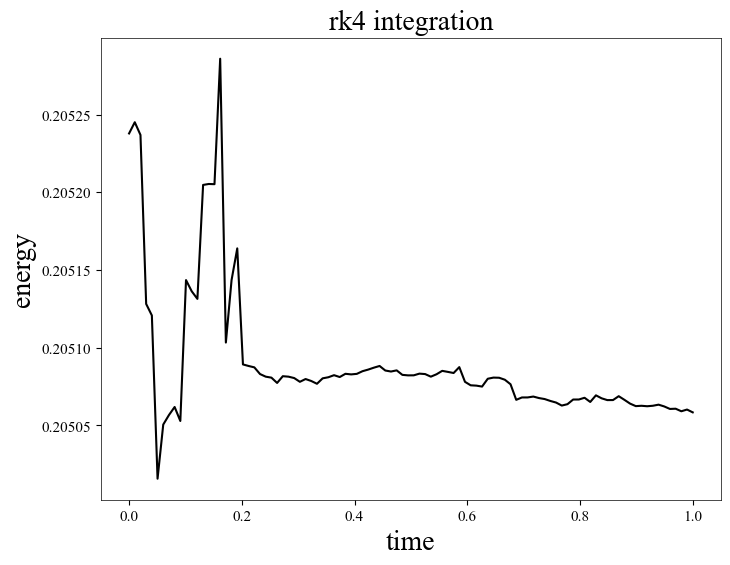

In [ ]:
plt.plot(np.linspace(0, t_end, rk4_steps), model.hamiltonian(aa_rk4).detach())
plt.xlabel('time', fontsize=20)
plt.ylabel('energy', fontsize=20)
plt.title('rk4 integration', fontsize=20)

In [ ]:
H_correct[0].detach()

tensor(0.2082, dtype=torch.float64)

In [ ]:
model.hamiltonian(aa0).detach(), np.repeat(H_correct, len(aa0))

(tensor(0.2052),
 tensor([0.2082, 0.2082, 0.2082,  ..., 0.2082, 0.2082, 0.2082],
        dtype=torch.float64))

In [ ]:
(model.hamiltonian(aa_euler_step).detach() - H_correct[0]) / H_correct[0]

tensor([-0.0145, -0.0145, -0.0145, -0.0153, -0.0153, -0.0159, -0.0157, -0.0157,
        -0.0156, -0.0157, -0.0153, -0.0153, -0.0153, -0.0149, -0.0149, -0.0149,
        -0.0146, -0.0155, -0.0150, -0.0149, -0.0153, -0.0153, -0.0153, -0.0153,
        -0.0153, -0.0153, -0.0153, -0.0153, -0.0153, -0.0153, -0.0153, -0.0152,
        -0.0152, -0.0152, -0.0152, -0.0152, -0.0152, -0.0152, -0.0151, -0.0151,
        -0.0151, -0.0151, -0.0151, -0.0151, -0.0151, -0.0151, -0.0151, -0.0150,
        -0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0151, -0.0150, -0.0150,
        -0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0150,
        -0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0150,
        -0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0149, -0.0149,
        -0.0149, -0.0149, -0.0149, -0.0149, -0.0149, -0.0149, -0.0149, -0.0149,
        -0.0149, -0.0149, -0.0149, -0.0149, -0.0149, -0.0149, -0.0149, -0.0149,
        -0.0148, -0.0148, -0.0148, -0.01

In [ ]:
100 * ((model.hamiltonian(aa_rk4).detach() - model.hamiltonian(aa0).detach()) / model.hamiltonian(aa0).detach()).numpy()

array([ 0.00126333,  0.00478469,  0.0007914 , -0.05218865, -0.05579714,
       -0.1069911 , -0.09000872, -0.08703191, -0.08449799, -0.0888906 ,
       -0.04471031, -0.04821714, -0.05060586, -0.01487682, -0.01457913,
       -0.01464448,  0.02469305, -0.06429921, -0.04471031, -0.03477066,
       -0.07115314, -0.07164686, -0.07207523, -0.07417352, -0.07499396,
       -0.07529891, -0.07696156, -0.07484875, -0.07499396, -0.07542959,
       -0.0766058 , -0.07573453, -0.07635168, -0.07722294, -0.07551672,
       -0.07517547, -0.07452929, -0.07511013, -0.07409365, -0.07428243,
       -0.07411543, -0.07328048, -0.07277224, -0.07216962, -0.0716396 ,
       -0.07306267, -0.07338212, -0.0730191 , -0.07442764, -0.07458737,
       -0.07457285, -0.07404283, -0.07418078, -0.07499396, -0.07423887,
       -0.07317157, -0.07349829, -0.07384679, -0.07200263, -0.07661305,
       -0.07770213, -0.07780378, -0.07810147, -0.07564741, -0.07528438,
       -0.0753352 , -0.07595235, -0.07737541, -0.08225448, -0.08

Text(0, 0.5, 'energy')

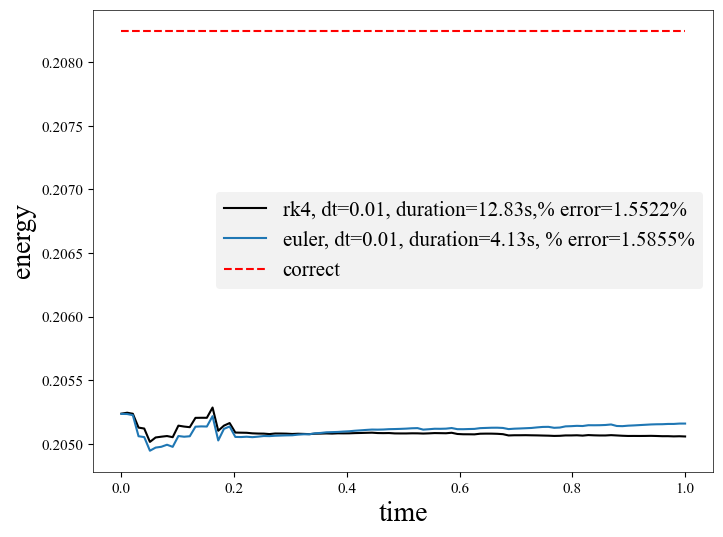

In [ ]:
euler_percent_error = np.max(100 * (torch.abs(model.hamiltonian(aa_euler_step).detach() - H_correct[0]) / H_correct[0]).numpy())
rk4_percent_error = np.max(100 * (torch.abs(model.hamiltonian(aa_rk4).detach() - H_correct[0]) / H_correct[0]).numpy())

plt.plot(np.linspace(0, t_end, rk4_steps), model.hamiltonian(aa_rk4).detach(), label=f'rk4, dt={t_end/rk4_steps}, duration={duration_rk4:.2f}s,% error={rk4_percent_error:.4f}%')
plt.plot(np.linspace(0, t_end, euler_steps), model.hamiltonian(aa_euler_step).detach(), label=f'euler, dt={t_end/euler_steps}, duration={euler_duration:.2f}s, % error={euler_percent_error:.4f}%')
plt.plot(np.linspace(0, t_end, rk4_steps), np.repeat(H_correct[0], len(aa_rk4)), 'r--', label='correct')
plt.legend(fontsize=15)

plt.xlabel('time', fontsize=20)
plt.ylabel('energy', fontsize=20)

In [ ]:
aa_guess

tensor([[[1.5708, 0.1250],
         [1.5808, 0.1250],
         [1.5908, 0.1250],
         ...,
         [5.2676, 0.1250],
         [5.2776, 0.1250],
         [5.2876, 0.1250]],

        [[1.5708, 0.1867],
         [1.5808, 0.1867],
         [1.5908, 0.1867],
         ...,
         [5.2676, 0.1867],
         [5.2776, 0.1867],
         [5.2876, 0.1867]],

        [[1.5708, 0.2608],
         [1.5808, 0.2608],
         [1.5908, 0.2608],
         ...,
         [5.2676, 0.2608],
         [5.2776, 0.2608],
         [5.2876, 0.2608]],

        ...,

        [[1.5708, 0.8164],
         [1.5808, 0.8164],
         [1.5908, 0.8164],
         ...,
         [5.2676, 0.8164],
         [5.2776, 0.8164],
         [5.2876, 0.8164]],

        [[1.5708, 0.9645],
         [1.5808, 0.9645],
         [1.5908, 0.9645],
         ...,
         [5.2676, 0.9645],
         [5.2776, 0.9645],
         [5.2876, 0.9645]],

        [[1.5708, 1.1250],
         [1.5808, 1.1250],
         [1.5908, 1.1250],
         ...,
 

In [ ]:
aa0

tensor([1.5708, 0.1250], requires_grad=True)

Text(0, 0.5, 'energy')

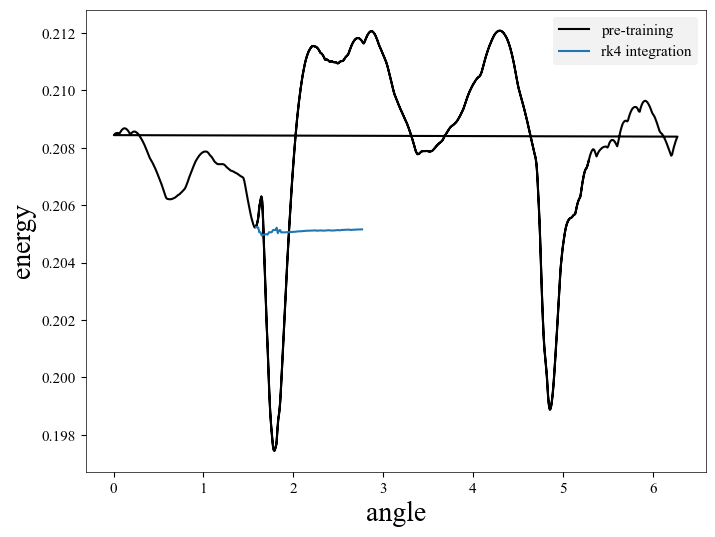

In [ ]:
plt.plot(aa_guess[0][...,0].detach().numpy(), model.hamiltonian(aa_guess[0]).detach(), label='pre-training')
plt.plot(aa_euler_step[...,0].detach().numpy(), model.hamiltonian(aa_euler_step).detach(), label='rk4 integration')
plt.legend()
plt.xlabel('angle', fontsize=20)
plt.ylabel('energy', fontsize=20)

In [ ]:
rk4_percent_error

np.float32(0.0040722056)

## compared to actionAngleVertical and numerical integration

In [ ]:
aa0

tensor([1.5708, 0.1250], requires_grad=True)

In [ ]:
ps0 = model.aa_to_ps(aa_rk4[0])

In [ ]:
H(ps0, model.targetPotential).detach()

tensor(0.2082)

### numerical integration

In [ ]:
from galpy.orbit import Orbit
o_lf = Orbit(ps0.detach().numpy())
st = time()
lf_steps = 100
o_lf.integrate(np.linspace(0, t_end, lf_steps), pot=IsothermalDiskPotential(), method='leapfrog')
duration_lf = time() - st

### aAVI

In [ ]:
from galpy.actionAngle import actionAngleVerticalInverse, actionAngleVertical
from galpy.potential import IsothermalDiskPotential

In [ ]:
aAV = actionAngleVertical(pot=IsothermalDiskPotential())
j0, _, theta0 = aAV.actionsFreqsAngles(float(ps0.detach()[0]),float(ps0.detach()[1]))

In [ ]:
# aAVI = actionAngleVerticalInverse(pot=IsothermalDiskPotential(), Es=np.linspace(0, 1, 1000), setup_interp=True)
# st = time()
# q_aAVI, p_aAVI = aAVI(j0, aa_guess[0][..., 0].detach().numpy())
# duration_aAVI = time() - st

In [ ]:
ps_aAVI = torch.stack([torch.tensor(q_aAVI), torch.tensor(p_aAVI)], dim=-1)

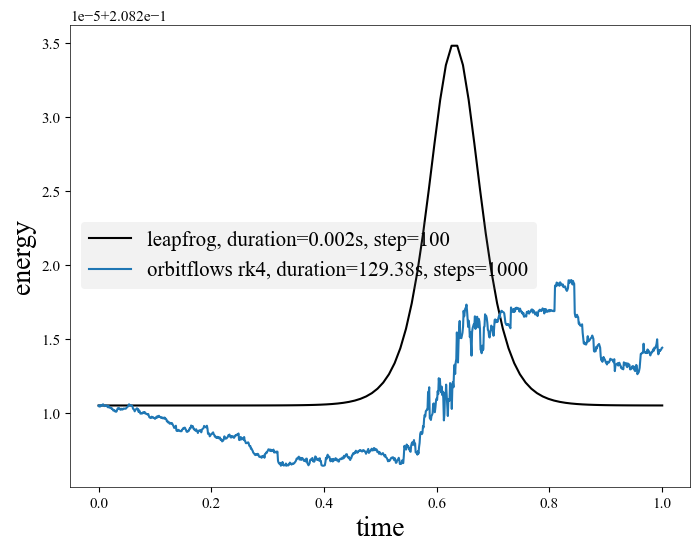

In [ ]:
plt.plot(o_lf.time(), o_lf.E(o_lf.time()), label=f'leapfrog, duration={duration_lf:.3f}s, step={lf_steps}')
#plt.plot(np.linspace(0, t_end, len(ps_aAVI)), H(ps_aAVI, isoDiskPotential), label=f'aAVI, duration={duration_aAVI:.2f}s, steps={len(ps_aAVI)}')
plt.plot(np.linspace(0, t_end, len(aa_rk4)), model.hamiltonian(aa_rk4).detach(), label=f'orbitflows rk4, duration={duration_rk4:.2f}s, steps={rk4_steps}')
plt.xlabel('time', fontsize=20)
plt.ylabel('energy', fontsize=20)
plt.legend(fontsize=15)